# Прогнозирование сердечных заболеваний

### Сердечные заболевания являются одной из ведущих причин смерти людей большинства рас. Поэтому, выявление и предотвращение факторов, оказывающих наибольшее влияние на сердечные заболевания, очень важно в здравоохранении

### Цель:
Прогнозирование возможного возникновения сердечных заболеваний

### Описание датасета:


*   Объем данных: 319795 элементов
*   Признаков: 18
*   Классов: 2
*   Типы и описание признаков:
    * HeartDisease (наличие сердечных заболеваний) - Номинальный
    * BMI (индекс массы тела) - Колличественный
    * Smoking (Выкурили ли вы хотя бы 100 сигарет за всю свою жизнь?) - Номинальный
    * AcoholDrinking (Сильно пьющие (взрослые мужчины, употребляющие более 14 напитков в неделю, и взрослые женщины, употребляющие более 7 напитков в неделю) - Номинальный
    * Stroke (Наличие инсульта) - Номинальный
    * PhysiclHealth (Теперь подумайте о своем физическом здоровье, которое включает в себя физические заболевания и травмы за последние 30 дней)- Колличественный
    * MentalHealth (Размышляя о своем психическом здоровье, сколько дней в течение последних 30 дней ваше психическое здоровье было не в порядке?) - Колличественный
    * DiffWalking (Испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице?) - Номинальный
    * Sex (Пол) - Номинальный
    * AgeCategory (Возраст) - Колличественный
    * Race (Раса)- Номинальный
    * Diabetic (Наличие диабета)- Номинальный
    * PhysicalActivity (Занимались ли физической активностью или физическими упражнениями в течение последних 30 дней, помимо своей обычной работы) - Номинальный
    * GenHealth (В целом ваше здоровье...) - Номинальный
    * SleepTime (Часы сна) - Колличественный
    * Asthma (Наличие астмы) - Номинальный
    * KidneyDisease (Не считая камней в почках, инфекции мочевого пузыря или недержания мочи, вам когда-нибудь говорили, что у вас заболевание почек?) - Номинальный
    * SkinCancer (Наличие рака кожи) - Номинальный
* Есть пропущенные значения
* Классы несбалансированы





In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Чтение данных

In [46]:
url = 'https://github.com/JulianKo1/ML-Homeworks/raw/main/Heart_data.csv'
df = pd.read_csv(url)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,87,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,66,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,41,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,38,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,48,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25,Hispanic,No,No,Good,12.0,No,NaN,No


# Визуализация данных, основные значения

In [47]:
dvis = pd.read_csv(url)

In [48]:
dvis.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
count,287738.000000,319795.00000,319795.000000,319795.000000,319795.000000
mean,28.319325,3.37171,3.898366,54.953670,7.097075
std,6.354020,7.95085,7.955235,18.784779,1.436007
min,12.020000,0.00000,0.000000,18.000000,1.000000
25%,24.020000,0.00000,0.000000,40.000000,6.000000
50%,27.320000,0.00000,0.000000,57.000000,7.000000
75%,31.400000,2.00000,3.000000,69.000000,8.000000
max,94.850000,30.00000,30.000000,96.000000,24.000000


In [49]:
corr_matrix = dvis.corr()
corr_matrix

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
BMI,1.000000,0.110142,0.063784,-0.011608,-0.052453
PhysicalHealth,0.110142,1.000000,0.287987,0.108973,-0.061387
MentalHealth,0.063784,0.287987,1.000000,-0.154619,-0.119717
AgeCategory,-0.011608,0.108973,-0.154619,1.000000,0.106828
SleepTime,-0.052453,-0.061387,-0.119717,0.106828,1.000000


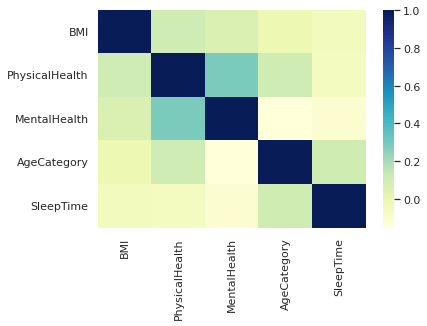

In [50]:
import seaborn as sns
sns.heatmap(corr_matrix, cmap="YlGnBu")
pass

Как можно заметить по данной матрице, наблюдается немалое значение корреляции между физическим и ментальным состояниями. Также заметим, что физическое состояние зависит от возраста. 

Еще можно отметить, что ментальное состояние практически никак не зависит от времени сна и возрастной категории.

### Визуализация и интерпретация некоторых данных:

Зависимость наличия сердечных заболеваний от возраста:

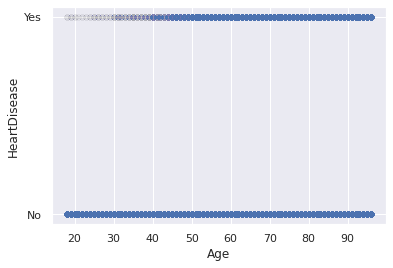

In [51]:
plt.plot(dvis['AgeCategory'], dvis['HeartDisease'], 'o', alpha = 0.002)
plt.xlabel('Age')
plt.ylabel('HeartDisease')
pass

Выводы по данному графику: чем больше возраст, тем больше людей страдающих сердечными заболеваниями. У большинства человек сердечные заболевания появляются после 45 лет.

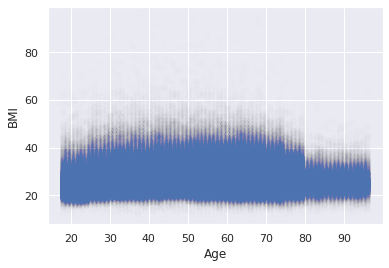

In [52]:
plt.plot(dvis['AgeCategory'], dvis['BMI'], 'o', alpha = 0.002)
plt.xlabel('Age')
plt.ylabel('BMI')
pass

Как видно, индекс массы тела увеличивается с годами, и резко уменьшается в преклонном возрасте

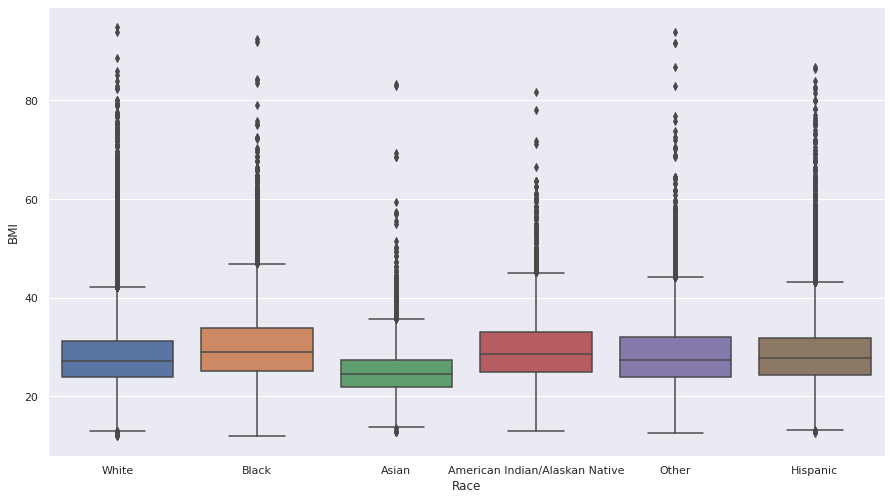

In [53]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(x="Race", y="BMI", data=dvis)
pass

Темнокожие люди имею больший индекс массы тела среди рас.

Азиаты наоборот - наименьший индекс.

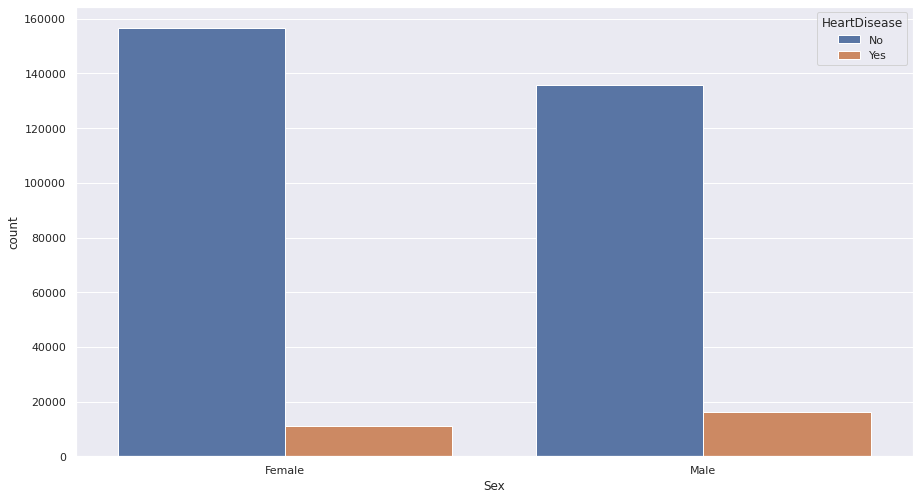

In [54]:
sns.countplot(data=dvis,x='Sex',hue='HeartDisease')

По графику видно, что мужчины подвержены сердечным заболеваниям больше женщин

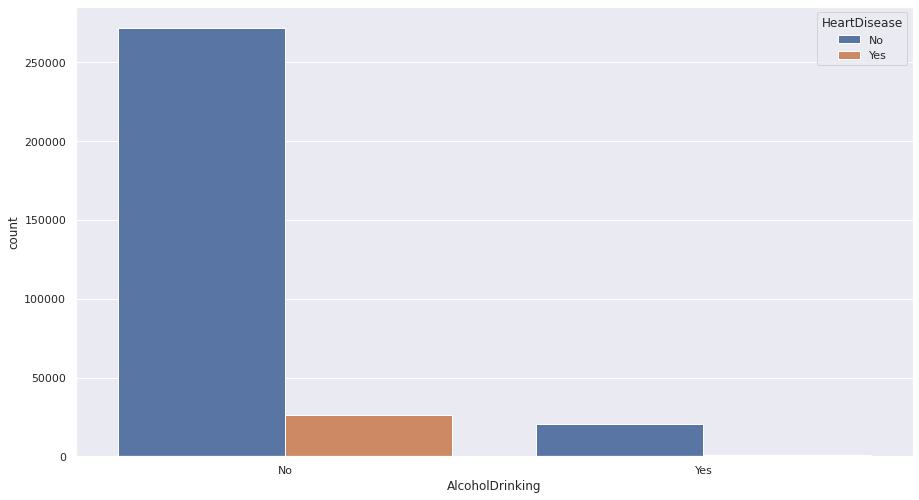

In [55]:
sns.countplot(data=dvis,x='AlcoholDrinking',hue='HeartDisease')

По графику, только малая часть пьющих людей подвергаются риску сердечных заболеваний

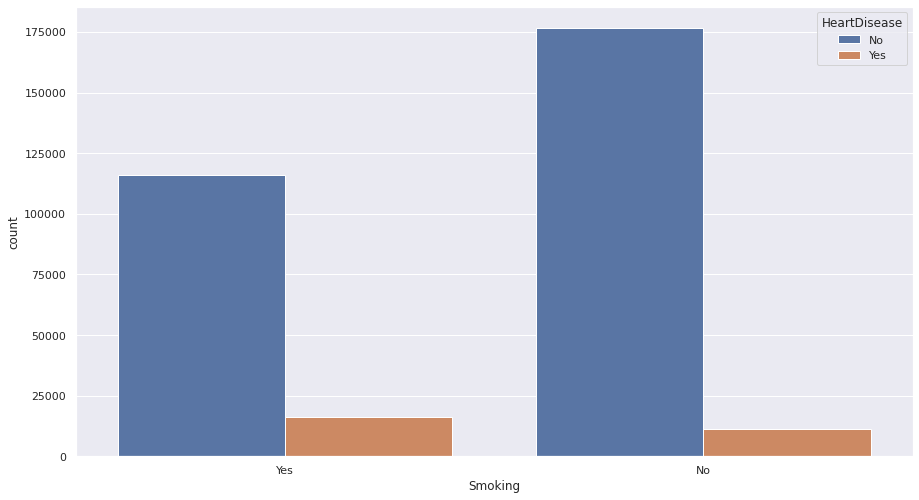

In [56]:
sns.countplot(data=dvis,x='Smoking',hue='HeartDisease')

Курящие люди более подвержены риску сердечных заболеваний

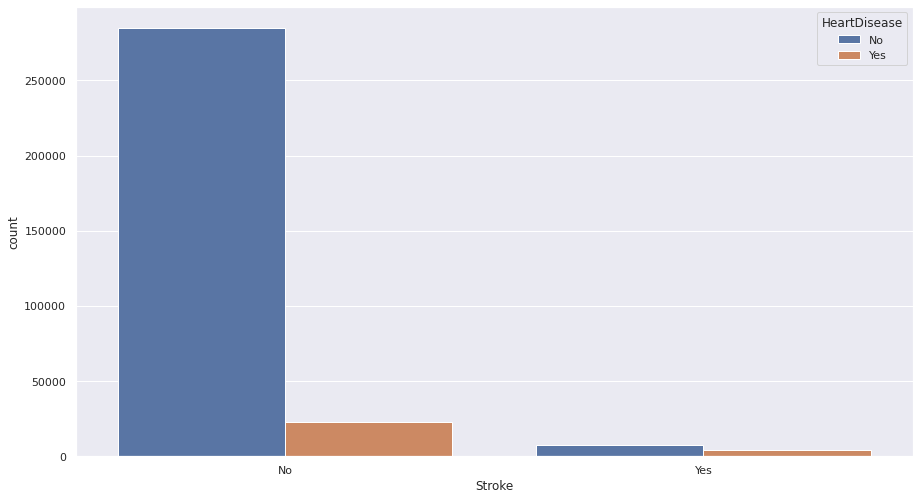

In [57]:
sns.countplot(data=dvis,x='Stroke',hue='HeartDisease')

По графику, около половины людей, имеющих инсульт, страдает и от сердечных заболеваний

# Борьба с пропущенными значениями

Проверка на наличие пропущенных значений:

In [58]:
df.isna().sum()

HeartDisease            0
BMI                 32057
Smoking                 0
AlcoholDrinking         0
Stroke                  0
PhysicalHealth          0
MentalHealth            0
DiffWalking             0
Sex                     0
AgeCategory             0
Race                    0
Diabetic                0
PhysicalActivity        0
GenHealth           16429
SleepTime               0
Asthma                  0
KidneyDisease       22357
SkinCancer              0
dtype: int64

Борьба с пропущенными значениями количественных переменных: заполнение пропущенных значений медианой

In [59]:
df = df.fillna(df.median(axis=0), axis=0)

<ipython-input-59-e477291322f6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median(axis=0), axis=0)


Борьба с пропущенными значениями номинальных переменных: заполнение пропущеных значений модой

In [60]:
df['GenHealth'].fillna(df['GenHealth'].mode().iloc[0], inplace=True)

In [61]:
df['KidneyDisease'].fillna(df['KidneyDisease'].mode().iloc[0], inplace=True)

Пропущенных значений не осталось:

In [62]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [63]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [64]:
pd.unique(df['SkinCancer'])

array(['Yes', 'No'], dtype=object)

# Бинаризация нормальных признаков

Так как библиотека ***scikit-learn*** практически не умеет работать с категориальными признаками, необходимо закодировать их с помощью числовых признаков.

Кодировка категориальных **бинарных** признаков:

In [65]:
def bi(column):
  df[column] = pd.factorize(df[column])[0]

In [66]:
bi('HeartDisease')

In [67]:
bi('Smoking')

In [68]:
bi('AlcoholDrinking')

In [69]:
bi('Stroke')

In [70]:
bi('DiffWalking')

In [71]:
bi('Sex')

In [72]:
bi('PhysicalActivity')

In [73]:
bi('Asthma')

In [74]:
bi('KidneyDisease')

In [75]:
bi('SkinCancer')

Кодировка категориальных **небинарных** признаков:

Для ***\'Diabetic'***:

In [76]:
ind = 0
for x in df['Diabetic']:
  if x == 'Yes':
    df.at[ind, 'Diabetic'] = 'YesDiabetic'
  elif x == 'No':
    df.at[ind, 'Diabetic'] = 'NoDiabetic'
  elif x == 'No, borderline diabetes':
    df.at[ind, 'Diabetic'] = 'Borderline'
  elif x == 'Yes (during pregnancy)':
    df.at[ind, 'Diabetic'] = 'Pregnancy'
  ind += 1

In [77]:
dummies = pd.get_dummies(df['Diabetic'])
df = pd.concat((df, dummies), axis=1)
df = df.drop(['Diabetic'], axis=1)

Для ***\'Race'***:

In [78]:
ind = 0
for x in df['Race']:
  if x == 'Other':
    df.at[ind, 'Race'] = 'OtherRace'
  ind += 1

In [79]:
dummies = pd.get_dummies(df['Race'])
df = pd.concat((df, dummies), axis=1)
df = df.drop(['Race'], axis=1)

Для ***\'GenHealth'***:

In [80]:
dummies = pd.get_dummies(df['GenHealth'])
df = pd.concat((df, dummies), axis=1)
df = df.drop(['GenHealth'], axis=1)

In [81]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asian,Black,Hispanic,OtherRace,White,Excellent,Fair,Good,Poor,Very good
0,0,16.60,0,0,0,3.0,30.0,0,0,59,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,1,0,1,0.0,0.0,0,0,87,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,66,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,1,0,0,0.0,0.0,0,0,77,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,1,0,0,28.0,0.0,1,0,41,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,0,0,0,7.0,0.0,1,1,60,...,0,0,1,0,0,0,1,0,0,0
319791,0,29.84,0,0,0,0.0,0.0,0,1,38,...,0,0,1,0,0,0,0,0,0,1
319792,0,24.24,1,0,0,0.0,0.0,0,0,48,...,0,0,1,0,0,0,0,1,0,0
319793,0,32.81,1,0,0,0.0,0.0,0,0,25,...,0,0,1,0,0,0,0,1,0,0


# Нормализация колличественных признаков

Так как многие алгоритмы машинного обучения чувствительны к масштабированию данных, колличественные признаки полезно нормализовать.

Стандартизация всех признаков:

In [82]:
ds = (df - df.mean(axis = 0))/df.std(axis = 0)

# Отбор признаков, разбиение данных на обучающую и тестовую выборки

In [83]:
X = ds.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [84]:
df.shape

(319795, 30)

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Метод k ближайших соседей

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

### Для 10 соседей:

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

Точность на обучающей выборке:

In [88]:
accuracy_score(y_train, y_train_predict)

0.9196150863470727

Точность на тренировочной выборке:

In [89]:
accuracy_score(y_test, y_test_predict)

0.912256563559269

Среднеквадратичная ошибка на обучающей выборке:

In [90]:
mean_squared_error(y_train, y_train_predict)

0.0803849136529273

Среднеквадратичная ошибка на тренировочной выборке:

In [91]:
mean_squared_error(y_test, y_test_predict)

0.08774343644073096

### Для 5 соседей:

In [92]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

Точность на обучающей выборке:

In [93]:
accuracy_score(y_train, y_train_predict)

0.9257106643429533

Точность на тренировочной выборке:

In [94]:
accuracy_score(y_test, y_test_predict)

0.905427209846277

Среднеквадратичная ошибка на обучающей выборке:

In [95]:
mean_squared_error(y_train, y_train_predict)

0.07428933565704661

Среднеквадратичная ошибка на тренировочной выборке:

In [96]:
mean_squared_error(y_test, y_test_predict)

0.094572790153723

##Общие выводы
В данной работе реализовано обучение модели посредством метода k ближайших соседей, предсказывающей наличие сердечных заболеваний у человека. 

Лучше всего себя показал knn(n=10), так как имеет наименьшую ошибку на тесте. У knn(n=5) ошибка больше на 7,2%. 

Такое небольшое значение ошибки можно обосновать тем, что признаки из датасета хорошо подобраны автором: с помощью них довольно неплохо получается предсказать наличие сердечных заболеваний.



#Нейронная сеть


ВЫШЕ ДОБАВИЛ ВЫВОДЫ К ПЕРВОЙ ЛАБЕ, ЧТОБЫ ПОЛУЧИТЬ ОСТАВШИЙСЯ БАЛЛ)

##Обучаем классификатор

In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [99]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), random_state=42,
              solver='lbfgs')

##Проверка качества классификатора

In [100]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

#####Ошибки на обучающей и тестовой выборках

In [101]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.08244039925618939 0.08575466860123329


##Подбор гиперпараметров

Подбирается оптимальное значение параметра регуляризации *alpha*

In [102]:

alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

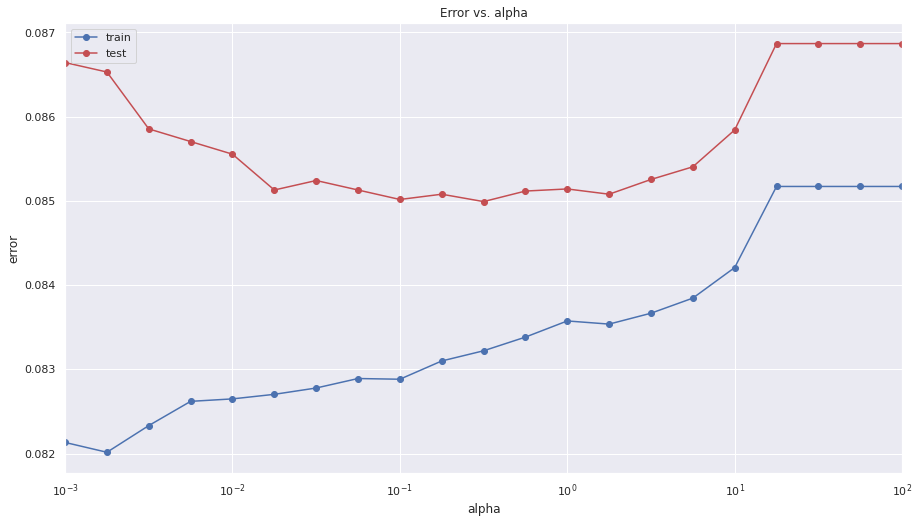

In [103]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

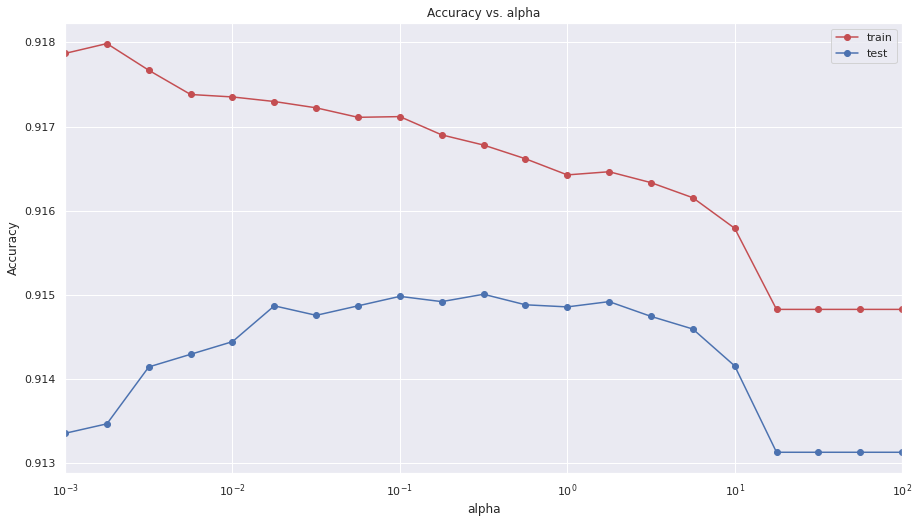

In [104]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [105]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.08201512637275585 0.08499168219740084


Оптимальное значение alpha:

In [106]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.31622777]


In [107]:
alpha_opt = alpha_opt[0]

###Классификатор при найденном оптимальном значении alpha:

Повторим обучение:

In [108]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.0821902387365226
0.08633003539756595


###Матрица рассогласования:

In [109]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[72403  6301]
 [  601   644]]


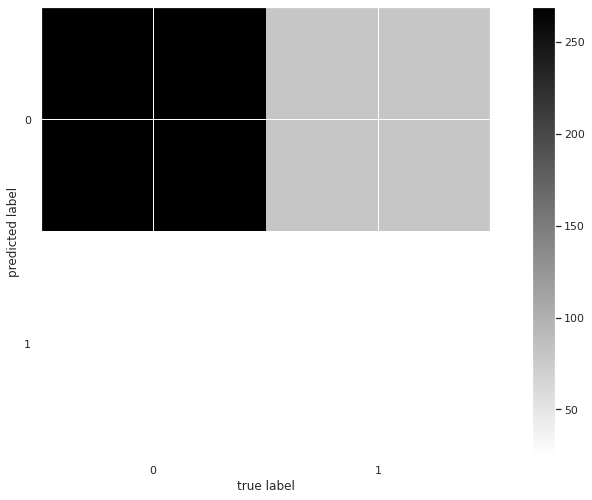

In [116]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

###Другие метрики качества:

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     73004
           1       0.52      0.09      0.16      6945

    accuracy                           0.91     79949
   macro avg       0.72      0.54      0.56     79949
weighted avg       0.88      0.91      0.89     79949



##Выводы:
Наблюдается совсем небольшое переобучение. Необходимо заметить, что с ростом коэффициента регуляризации растет ошибка, снижается точность. 